# Steepest descent

The golden search method is typically used on single-valued functions. Descent algorithms, on the other hand, works well with multivariable functions. Given a function $f:\mathbb{R}^n\rightarrow \mathbb{R}$, on a high level, the descent algorithm works by starting with an initial point $x_0$, the algorithm iteratively refine the solution by the following scheme <br>

$$x_n = x_{n-1} + \lambda d_{n-1}$$

Where $d_{n-1}$ represent the direction chosen at step $n-1$, and $\lambda$ represent the stepsize. A typical choice of $d_{n-1}$ is the negative gradient, since it represents the direction of steepest descent <br>

$$x_n = x_{n-1} - \lambda \nabla f(x_{n-1})$$

These types of algorithms are known as steepest descent algorithms.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def steepest_descent(func, func_grad, init_point, 
                     step_size=0.1, 
                     tol=1e-5, 
                     max_iter=1e6):
    x = init_point
    nit = 0
    path = [init_point]
    while np.linalg.norm(func_grad(x)) > tol and nit < max_iter:
        x = x - step_size * func_grad(x)
        if func(x) < func(path[-1]):
            path.append(x)
            step_size *= 1.1
        else:
            x = path[-1]
            step_size /= 2
        nit += 1
    path = np.array(path)
    return {'x': x,
            'f(x)': func(x),
            'num_iter': nit,
            'path': path}

In [20]:
def plot(func, x_lim, y_lim, result):
    x_c = np.linspace(x_lim[0], x_lim[1], 1000)
    y_c = np.linspace(y_lim[0], y_lim[1], 1000)
    x, y = np.meshgrid(x_c, y_c)
    z = func((x, y))
    fig, ax = plt.subplots()
    contour = ax.contour(x, y, z, 50)
    plt.colorbar(contour)
    ax.plot(result['path'][:, 0], result['path'][:, 1], color="red")
    ax.plot(result['path'][0, 0], result['path'][0, 1], 'rx', markersize=5)
    ax.plot(result['path'][-1, 0], result['path'][-1, 1], 'ro', markersize=5)
    
    print(f"The estimated solution is: {result['x']} with function value: {result['f(x)']}")
    print(f"The number of iterations needed is: {result['num_iter']}")

We can see that gradient descent performs quite well on locally quadratic functions, since the norm of the gradient is high.

In [21]:
def quadratic(X):
    x, y = X
    return x**2 + y**2

def quadratic_grad(X):
    x, y = X
    return np.array([2*x, 2*y])

In [22]:
init_point = np.array([-0.5, 0.5])
results = steepest_descent(quadratic, quadratic_grad, init_point, step_size=0.1)

The estimated solution is: [-7.55486428e-07  7.55486428e-07] with function value: 1.141519486638674e-12
The number of iterations needed is: 17


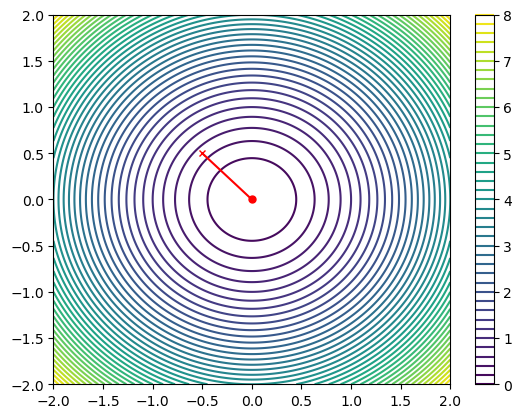

In [23]:
plot(quadratic, (-2, 2), (-2, 2), results)

However, the algorithm struggles to locate the minimum when the gradient is too small. Rosenbrock function is such an example. When the point reaches the valley, the gradient becomes near zero, so more steps are needed to locate the minimum

In [24]:
def Rosenbrock(X):
    x, y = X
    return (1 - x)**2 + 10*(y - x**2)**2

def Rosenbrock_grad(X):
    x, y = X
    return np.array([-2*(1-x) - 40*x*(y-x**2), 20*(y-x**2)])

In [25]:
init_point = np.array([-0.5, 0.5])
results = steepest_descent(Rosenbrock, Rosenbrock_grad, init_point, step_size=0.1)

The estimated solution is: [0.99998897 0.99997747] with function value: 1.2382656004709132e-10
The number of iterations needed is: 1339


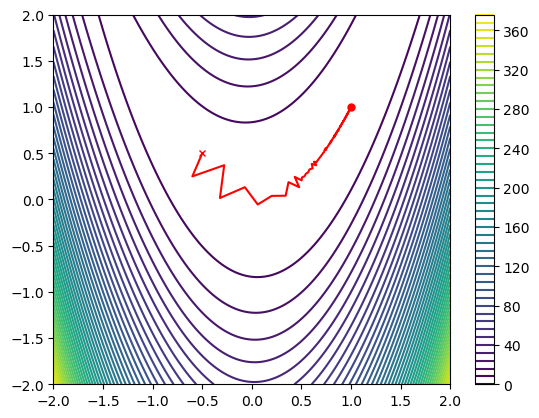

In [26]:
plot(Rosenbrock, (-2, 2), (-2, 2), results)